## Utils

In [ ]:
from dataclasses import dataclass
from typing import List, Tuple
import re

@dataclass
class LogData:
    val: List[Tuple[int, float]]
    hella: List[Tuple[int, float]]
    train: List[Tuple[int, float]]

def parse_log2(log_path: str) -> LogData:
    val_data: List[Tuple[int, float]] = []
    hella_data: List[Tuple[int, float]] = []
    train_data: List[Tuple[int, float]] = []
    
    with open(log_path, "r") as f:
        lines = f.readlines()
        
    for line in lines:
        line = line.strip()
        
        # Parse val loss lines
        val_match = re.match(r'(\d+) val loss ([\d.]+)', line)
        if val_match:
            step, value = val_match.groups()
            val_data.append((int(step), float(value)))
            continue
            
        # Parse hella lines    
        hella_match = re.match(r'(\d+) hella ([\d.]+)', line)
        if hella_match:
            step, value = hella_match.groups()
            hella_data.append((int(step), float(value)))
            continue
            
        # Parse train lines
        train_match = re.match(r'(\d+) train ([\d.]+)', line)
        if train_match:
            step, value = train_match.groups()
            train_data.append((int(step), float(value)))
            
    return LogData(val=val_data, hella=hella_data, train=train_data)

# Usage:
base_dir = "/root/.cache/huggingface/hub/models--andrew-healey--context-compression/snapshots/f45839ef8262a2d896b533884bc2230a71e3de67"
%ls $base_dir
parsed = parse_log2(base_dir + "/unselective_run_0/log2.txt")


memory_loss_run_0/  selective_run_0_continued/
selective_run_0/    unselective_run_0/


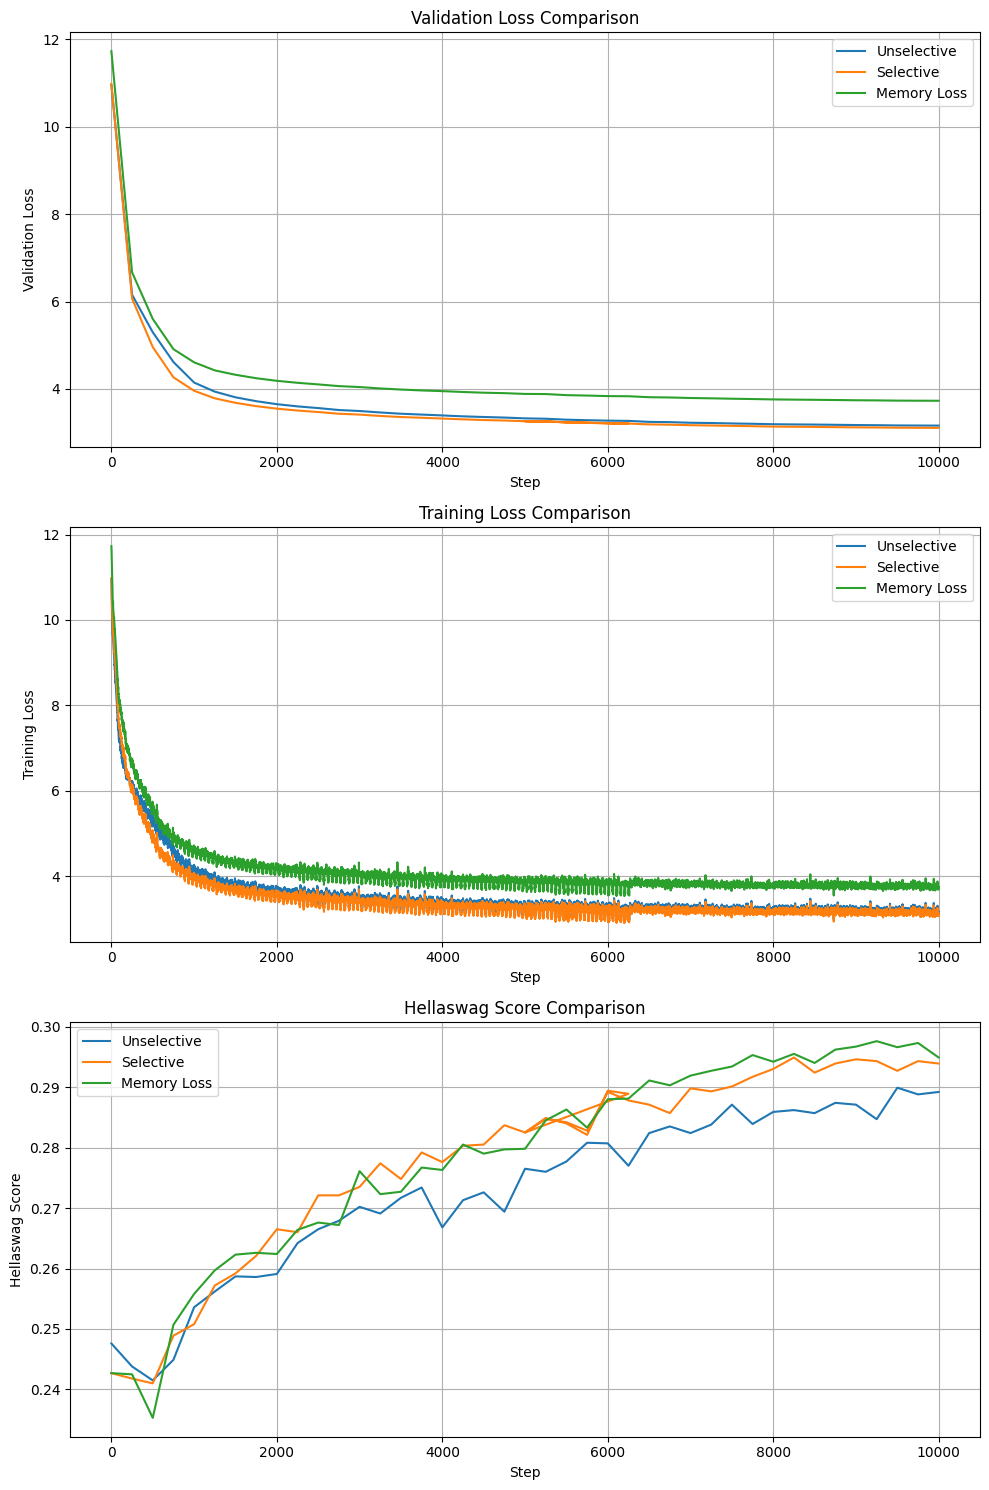

In [18]:
unselective_parsed = parse_log2(base_dir + "/unselective_run_0/log2.txt")
selective_parsed = parse_log2(base_dir + "/selective_run_0/log2.txt")
selective_continued_parsed = parse_log2(base_dir + "/selective_run_0_continued/log2.txt")
selective_full_parsed = LogData(val=selective_parsed.val + selective_continued_parsed.val, hella=selective_parsed.hella + selective_continued_parsed.hella, train=selective_parsed.train + selective_continued_parsed.train)
memory_loss_parsed = parse_log2(base_dir + "/memory_loss_run_0/log2.txt")

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Validation Loss
ax1.plot([x[0] for x in unselective_parsed.val], [x[1] for x in unselective_parsed.val], label='Unselective')
ax1.plot([x[0] for x in selective_full_parsed.val], [x[1] for x in selective_full_parsed.val], label='Selective')
ax1.plot([x[0] for x in memory_loss_parsed.val], [x[1] for x in memory_loss_parsed.val], label='Memory Loss')
ax1.set_xlabel('Step')
ax1.set_ylabel('Validation Loss')
ax1.set_title('Validation Loss Comparison')
ax1.legend()
ax1.grid(True)

# Training Loss
ax2.plot([x[0] for x in unselective_parsed.train], [x[1] for x in unselective_parsed.train], label='Unselective')
ax2.plot([x[0] for x in selective_full_parsed.train], [x[1] for x in selective_full_parsed.train], label='Selective')
ax2.plot([x[0] for x in memory_loss_parsed.train], [x[1] for x in memory_loss_parsed.train], label='Memory Loss')
ax2.set_xlabel('Step')
ax2.set_ylabel('Training Loss')
ax2.set_title('Training Loss Comparison')
ax2.legend()
ax2.grid(True)

# Hellaswag Score
ax3.plot([x[0] for x in unselective_parsed.hella], [x[1] for x in unselective_parsed.hella], label='Unselective')
ax3.plot([x[0] for x in selective_full_parsed.hella], [x[1] for x in selective_full_parsed.hella], label='Selective')
ax3.plot([x[0] for x in memory_loss_parsed.hella], [x[1] for x in memory_loss_parsed.hella], label='Memory Loss')
ax3.set_xlabel('Step')
ax3.set_ylabel('Hellaswag Score')
ax3.set_title('Hellaswag Score Comparison')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()
